<a href="https://colab.research.google.com/github/RomaZhm/ColabNotes/blob/main/homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
with np.load('/content/drive/MyDrive/учеба/data_7_1.npz') as data :
    x1 , y1 = data['x1'] , data['y1']
    x4 , y4 = data['x4'] , data['y4']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Задание 1

In [ ]:
class LagrangeInterpolator:
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        LI = 0
        yi = self.yk
        xj = self.xk
        for i in range(len(yi)):
            l = 1
            for j in range(len(xj)):
                if i == j:
                    l = l
                else:
                    l = l * (x - xj[j]) / (xj[i] - xj[j])
            LI = LI + yi[i] * l
        return LI

def funcC(x, y, X):
    lagrI = LagrangeInterpolator(x, y)
    return lagrI(X)

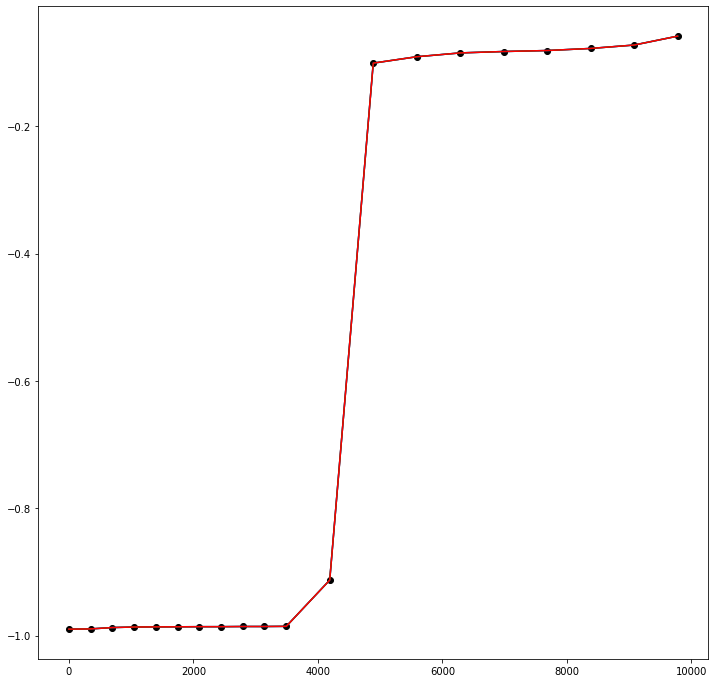

In [ ]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator

plt.figure(figsize=(12,12))
plt.plot(x1, y1, 'ko')

lagrI = LagrangeInterpolator(x1, y1)
plt.plot(x1, lagrI(x1), 'b-')

cubsplineI = CubicSpline(x1, y1)
plt.plot(x1, cubsplineI(x1), 'g-')

pchipI = PchipInterpolator(x1, y1)
plt.plot(x1, pchipI(x1), 'r-')

# Задание 2

## np.polyfit и np.polyval

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


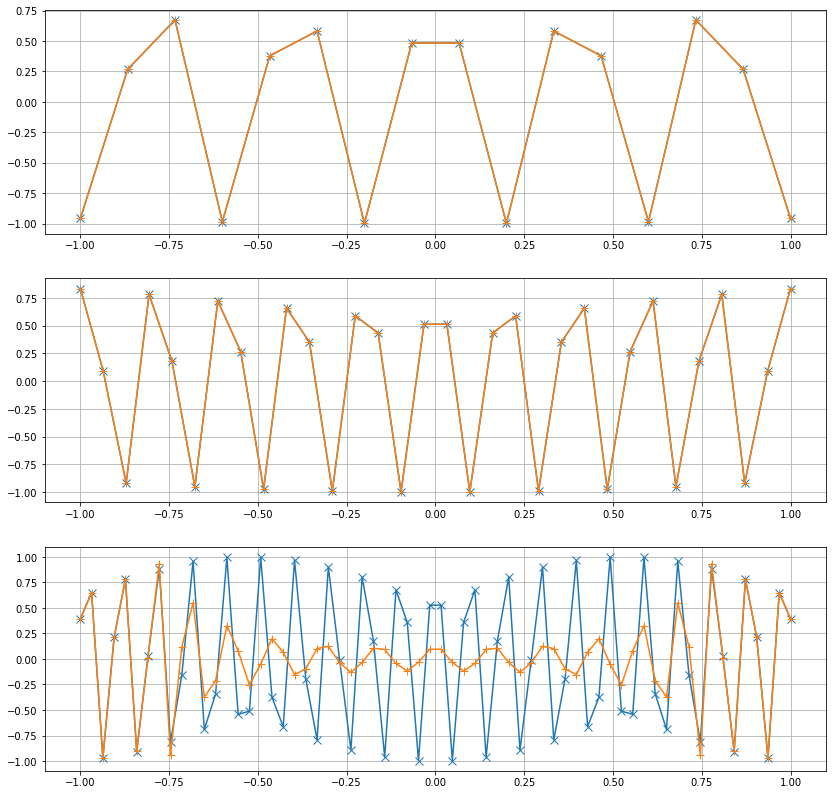

In [ ]:
fig, axs = plt.subplots(3, figsize=(14, 14))
i = 0
for n in [16, 32, 64]:
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)
    P = np.polyfit(x, y, n - 1)
    Y = np.polyval(P, x)
    axs[i].plot(x, y, '-x', ms = 8)
    axs[i].plot(x, Y, '-+', ms = 8)
    axs[i].grid()
    i += 1

## Многочлен Лагранжа

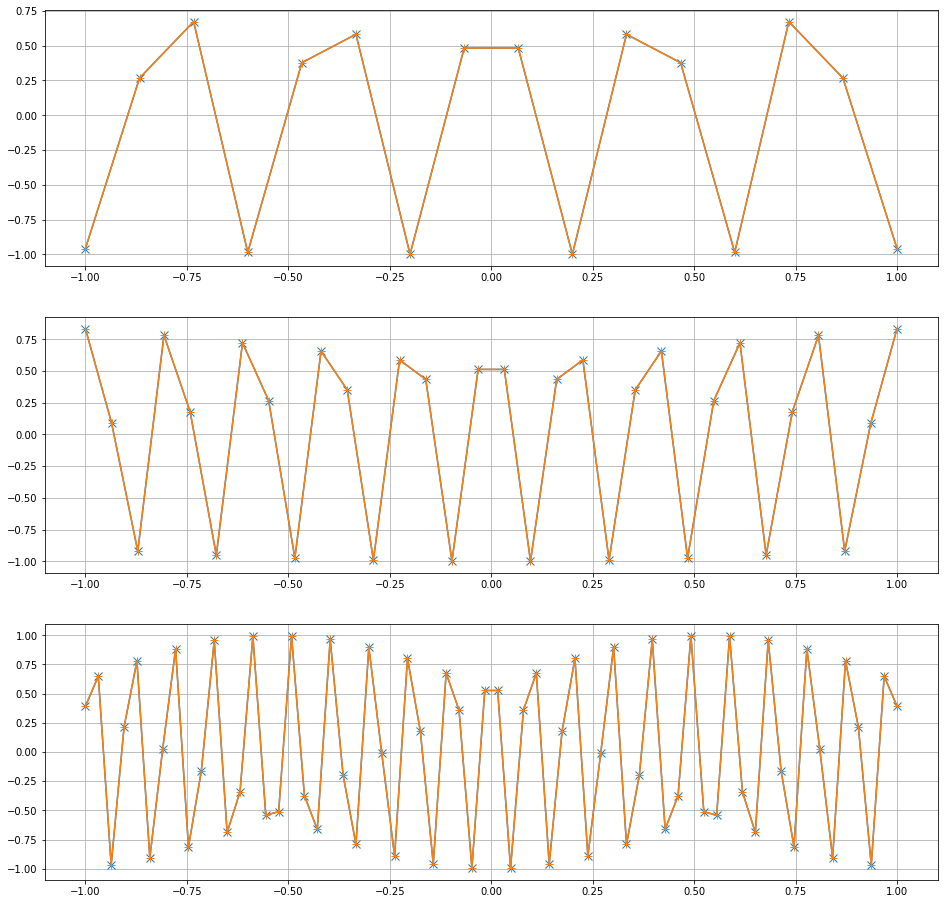

In [ ]:
fig, axs = plt.subplots(3, figsize=(16, 16))
i = 0
for n in [16, 32, 64]:
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)
    LagrY = LagrangeInterpolator(x, y)
    axs[i].plot(x, y, '-x', ms = 8)
    axs[i].plot(x, LagrY(x), '-+', ms = 8)
    axs[i].grid()
    i += 1

# Задание 3

## Экстраполяция по $y_1$ и $y_2$ с scipy.optimize.curve_fit

In [ ]:
def y_1(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1*x + p2 * x**2 + p3 * x**3 + p4 * x**4 + p5 * x**5

def y_2(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1*x + p2 * x**2 + p3 * x**3)/(1 + q1 * x + q2 * x**2)

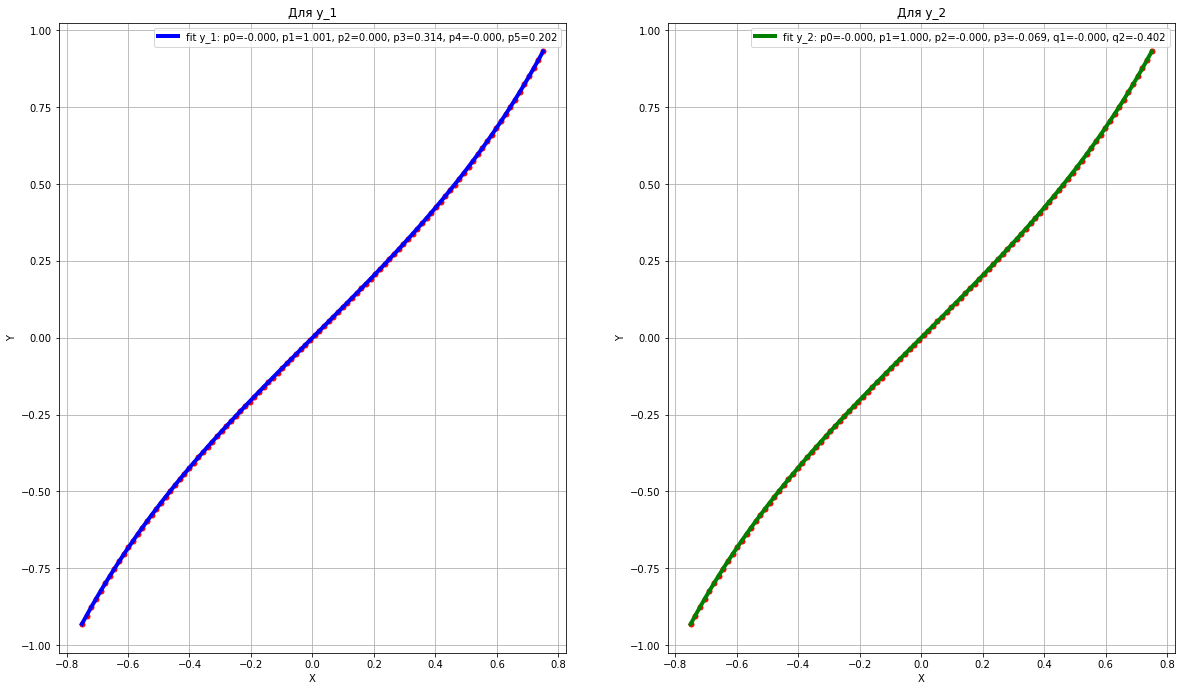

In [ ]:
from scipy.optimize import curve_fit

fig, axs = plt.subplots(nrows = 1, ncols =2, figsize=(20, 20))

popt, pcov = curve_fit(y_1, x4, y4)
axs[0].plot(x4, y4, 'ro', ms=5)
axs[0].plot(x4, y_1(x4, *popt), 'b-', linewidth=4,
            label='fit y_1: p0=%.3f, p1=%.3f, p2=%.3f, p3=%.3f, p4=%.3f, p5=%.3f' % tuple(popt))
axs[0].set(title = 'Для y_1',
       xlabel = 'X',
       ylabel = 'Y')
axs[0].legend()
axs[0].set_aspect(1)
axs[0].grid()

popt, pcov = curve_fit(y_2, x4, y4)
axs[1].plot(x4, y4, 'ro', ms=5)
axs[1].plot(x4, y_2(x4, *popt), 'g-', linewidth=4,
            label='fit y_2: p0=%.3f, p1=%.3f, p2=%.3f, p3=%.3f, q1=%.3f, q2=%.3f' % tuple(popt))
axs[1].set(title = 'Для y_2',
       xlabel = 'X',
       ylabel = 'Y')
axs[1].legend()
axs[1].set_aspect(1)
axs[1].grid()

plt.show()

## График за пределами исходных данных

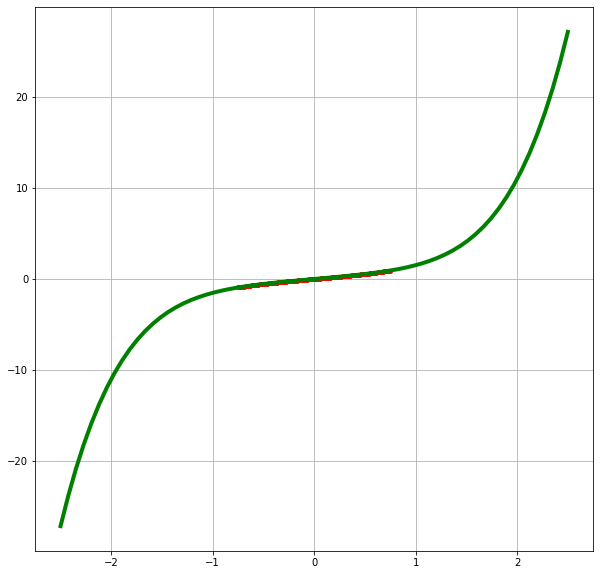

In [ ]:
xExtended = np.linspace(-2.5, 2.5, 67)
popt, pcov = curve_fit(y_1, x4, y4)

plt.figure(figsize=(10,10))
plt.plot(x4, y4, 'ro', ms = 4)
plt.plot(xExtended, y_1(xExtended, *popt), 'g-', linewidth=4)
plt.grid()
plt.show()


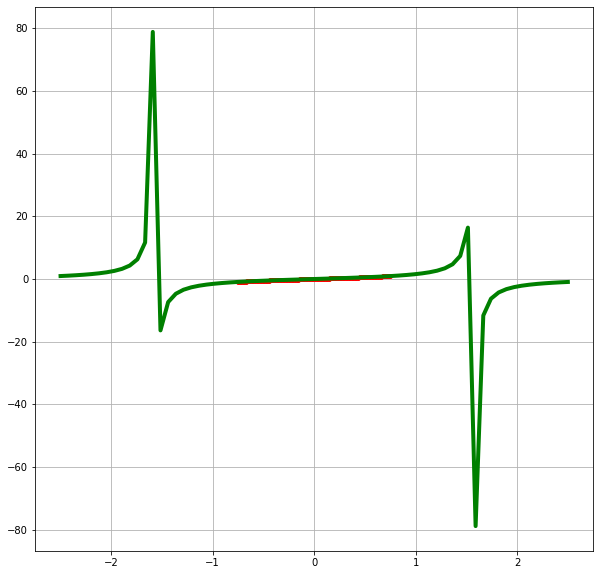

In [ ]:
xExtended = np.linspace(-2.5, 2.5, 67)
popt, pcov = curve_fit(y_2, x4, y4)

plt.figure(figsize=(10,10))
plt.plot(x4, y4, 'ro', ms = 4)
plt.plot(xExtended, y_2(xExtended, *popt), 'g-', linewidth=4)
plt.grid()
plt.show()

# Задание 4

Формируем набор данных

In [ ]:
from math import cos,sin, pi

def periodic(x):
    return cos(x/2 + sin(x + sin(x)))

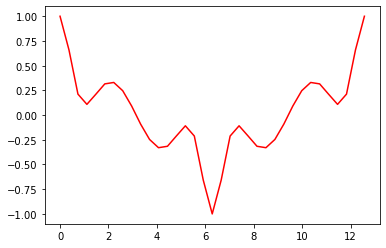

True


In [ ]:
N = 35
n = N - 1
x = np.linspace(0, 4*pi, N)
periodF = np.vectorize(periodic)
y = periodF(x)
plt.plot(x, y, 'r-')
plt.show()
print(y[-1] == y[0])

Формируем векторы известных значений $a = y(x_i), i = 0...n-1$, $h_i = x_{i+1} - x_i$, матрицу $A$ и вектор $q$ для решения системы **A**$c$=**q** 

In [ ]:
a = np.asarray([y[k] for k in range(n)], dtype=float)
h = np.asarray([(x[k+1] - x[k]) for k in range(n)], dtype=float)
A = np.zeros((n,n))
for k in range(0, n - 1):
    A[k][k-1] = h[k-1]
    A[k][k] = 2*(h[k-1] + h[k])
    A[k][k+1] = h[k]
A[-1][0], A[-1][-2], A[-1][-1] = h[-1], h[-2], 2*(h[-2] + h[-1])
# A[0][0], A[0][1], A[0][-1] = 2*(h[-1] + h[0]), h[0], h[-1] 
q = np.zeros(n)
for k in range(0, n - 1):
    q[k] = 3*(a[k+1] - a[k])/h[k] - 3*(a[k] - a[k-1])/h[k - 1]
q[-1] = 3*(a[0] - a[-1])/h[-1] - 3*(a[-1] - a[-2])/h[-2]
#q[0] = 3*(a[1] - a[0])/h[0] - 3*(a[0] - a[-1])/h[-1]

In [ ]:
def cubicSplineI(x0, x, y, h, a, A, q, n = len(x) - 1):
    a = np.append(a, y[-1])
    c = np.linalg.solve(A, q)
    c = np.append(c, c[1])
    b = np.asarray([((a[k+1] - a[k])/h[k] - h[k]*(2*c[k] + c[k+1])/3) 
                    for k in range(n)], dtype=float)
    d = np.asarray([((c[k+1] - c[k])/(3*h[k])) 
                    for k in range(n)], dtype=float)
    YY = np.asarray([(a[i] + b[i] * (x0[i] - x[i]) + c[i] * (x0[i] - x[i])**2 + d[i]*(x0[i] - x[i])**3)
            for i in range(n)], dtype=float)
    return YY

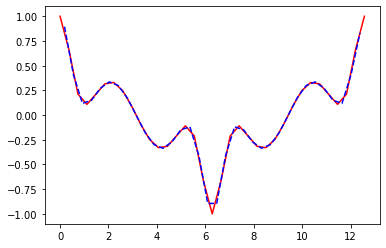

In [ ]:
xx = x + h[0]/2
xx = xx[0:len(x) - 1]
yy = cubicSplineI(xx, x, y, h, a, A, q)
plt.plot(x, y, 'r-')
plt.plot(xx, yy, 'b--')
plt.show()     

# Задание 5

Формирование матрицы ab для метода **solve_banded**

In [ ]:
def diagonal_form(a, upper = 1, lower= 1):
    n = a.shape[1]
    assert(np.all(a.shape ==(n,n)))
    ab = np.zeros((2*n-1, n))
    for i in range(n):
        ab[i,(n-1)-i:] = np.diagonal(a,(n-1)-i)
    for i in range(n-1): 
        ab[(2*n-2)-i,:i+1] = np.diagonal(a,i-(n-1))
    mid_row_inx = int(ab.shape[0]/2)
    upper_rows = [mid_row_inx - i for i in range(1, upper+1)]
    upper_rows.reverse()
    upper_rows.append(mid_row_inx)
    lower_rows = [mid_row_inx + i for i in range(1, lower+1)]
    keep_rows = upper_rows+lower_rows
    ab = ab[keep_rows,:]
    return ab

Модифицированный алгоритм для трехдиагональной матрицы с выбросами

In [ ]:
from scipy.linalg import solve_banded

def cyclicEliminationSolve(A, q):
    n = len(q) - 1
    f = q[1:]
    l = np.zeros(n)
    l[0], l[-1] = A[1][0], A[-1][0]
    B = A[1:n+1, 1:n+1]
    BB = diagonal_form(B)
    u = solve_banded((1, 1), BB, f)
    v = solve_banded((1, 1), BB, l)
    u = np.concatenate([[0],u])
    v = np.concatenate([[1],v])
    x = np.zeros(n + 1)
    x[0] = (f[0] - A[0][-1] * u[-1] - A[0][1] * u[1])/(A[0][0] + A[0][-1] * v[-1] + A[0][1] * v[1])
    for i in range(1, n + 1):
      x[i] = u[i] + x[0] * v[i]
    return x


def cubicSplineI_mod(x0, x, y, h, a, A, q, n = len(x) - 1):
    a = np.append(a, y[-1])
    c = cyclicEliminationSolve(A, q)
    c = np.append(c, c[1])
    b = np.asarray([((a[k+1] - a[k])/h[k] - h[k]*(2*c[k] + c[k+1])/3) 
                    for k in range(n)], dtype=float)
    d = np.asarray([((c[k+1] - c[k])/(3*h[k])) 
                    for k in range(n)], dtype=float)
    YY = np.asarray([(a[i] + b[i] * (x0[i] - x[i]) + c[i] * (x0[i] - x[i])**2 + d[i]*(x0[i] - x[i])**3)
            for i in range(n)], dtype=float)
    return YY

Сравнение результатов

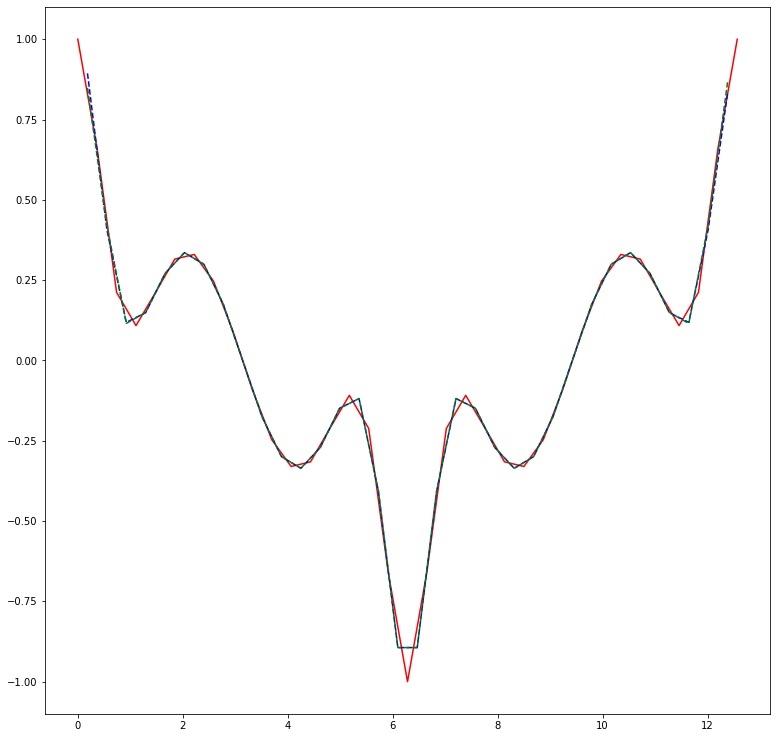

In [ ]:
xx = x + h[0]/2
xx = xx[0:len(x) - 1]
yy = cubicSplineI(xx, x, y, h, a, A, q)
yy_mod = cubicSplineI_mod(xx, x, y, h, a, A, q)

plt.figure(figsize=(13,13))
plt.plot(x, y, 'r-')
plt.plot(xx, yy, 'b--')
plt.plot(xx, yy_mod, 'g--')
plt.show()     